In [5]:
from keras.models import load_model
import cv2
import numpy as np
import mtcnn

1/1 [==============================] - 1s 667ms/step
Class: Spitting
Confidence Score: 100.0%


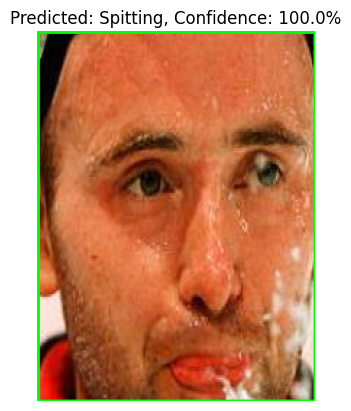

In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

# Load the model
model = load_model("Spitting.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Path to the image you want to classify
image_path = "Dataset/Spit/gettyimages-541817495-612x612_jpg.rf.3dcf241fca9596fe22da8d61c6f07135.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Resize the image to (224, 224) pixels as expected by the model
image_resized = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

# Convert the image to a numpy array and reshape it to the model's input shape (1, 224, 224, 3)
image_array = np.asarray(image_resized, dtype=np.float32).reshape(1, 224, 224, 3)

# Make predictions using the model
prediction = model.predict(image_array)

# Get the index of the highest predicted class
index = np.argmax(prediction)

# Get the corresponding class label from the labels file
class_name = class_names[index].strip().split(' ', 1)[1]  # Extract the label only

# Get the confidence score of the prediction
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name)
print("Confidence Score:", str(np.round(confidence_score * 100, 2)) + "%")

# If the predicted class is 'spitting', detect faces
if class_name.lower() == "spitting":
    detector = MTCNN()
    
    # Detect faces in the original image
    results = detector.detect_faces(image)
    
    # If faces are detected, crop the image around the first detected face
    if results:
        for result in results:
            x, y, width, height = result['box']
            # Draw bounding box on the image
            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
            
            # Crop the image around the detected face
            cropped_face = image[y:y + height, x:x + width]
            
            # Convert BGR (OpenCV format) to RGB (Matplotlib format)
            cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

            # Display the cropped face with the bounding box
            plt.imshow(cropped_face_rgb)
            plt.axis('off')  # Hide axis
            plt.title(f"Predicted: {class_name}, Confidence: {np.round(confidence_score * 100, 2)}%")
            plt.show()
            break  # Only show the first detected face
    else:
        print("No faces detected.")
else:
    print("Predicted class is not 'spitting'.")

In [31]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

# Load the model
model = load_model("Spitting.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Path to the image you want to classify
image_path = "Dataset/Not Spit/Abdoulaye_Wade_0003.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert BGR (OpenCV format) to RGB if Teachable Machine uses RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to (224, 224) pixels as expected by the model
image_resized = cv2.resize(image_rgb, (224, 224), interpolation=cv2.INTER_AREA)

# Convert the image to a numpy array and reshape it to the model's input shape (1, 224, 224, 3)
image_array = np.asarray(image_resized, dtype=np.float32).reshape(1, 224, 224, 3)

# Normalize the image if Teachable Machine normalizes to [0, 1]
image_array = image_array / 255.0

# Make predictions using the model
prediction = model.predict(image_array)

# Get the index of the highest predicted class
index = np.argmax(prediction)

# Get the corresponding class label from the labels file
class_name = class_names[index].strip().split(' ', 1)[1]  # Extract the label only

# Get the confidence score of the prediction
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name)
print("Confidence Score:", str(np.round(confidence_score * 100, 2)) + "%")

# If the predicted class is 'spitting', detect faces
if class_name.lower() == "spitting":
    detector = MTCNN()
    
    # Detect faces in the original image (before resizing)
    results = detector.detect_faces(image)
    
    # If faces are detected, crop the image around the first detected face
    if results:
        for result in results:
            x, y, width, height = result['box']
            # Draw bounding box on the image
            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
            
            # Crop the image around the detected face
            cropped_face = image[y:y + height, x:x + width]
            
            # Convert BGR (OpenCV format) to RGB (Matplotlib format)
            cropped_face_rgb = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)

            # Display the cropped face with the bounding box
            plt.imshow(cropped_face_rgb)
            plt.axis('off')  # Hide axis
            plt.title(f"Predicted: {class_name}, Confidence: {np.round(confidence_score * 100, 2)}%")
            plt.show()
            break  # Only show the first detected face
    else:
        print("No faces detected.")
else:
    print("Predicted class is not 'spitting'.")

1/1 [==============================] - 1s 691ms/step
Class: Non-Spitting
Confidence Score: 99.11%
Predicted class is not 'spitting'.


In [32]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image

# Load the model
model = load_model("Spitting.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Streamlit interface
st.title("Spitting Detection using Teachable Machine Model")

# Upload an image
uploaded_image = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    # Display the uploaded image
    st.image(uploaded_image, caption="Uploaded Image", use_column_width=True)
    
    # Convert the uploaded file to an OpenCV image
    image = np.array(Image.open(uploaded_image).convert('RGB'))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Ensure correct format for OpenCV processing

    # Resize the image to (224, 224) pixels as expected by the model
    image_resized = cv2.resize(image_rgb, (224, 224), interpolation=cv2.INTER_AREA)

    # Convert the image to a numpy array and reshape it to the model's input shape (1, 224, 224, 3)
    image_array = np.asarray(image_resized, dtype=np.float32).reshape(1, 224, 224, 3)

    # Normalize the image to [0, 1] as expected by Teachable Machine
    image_array = image_array / 255.0

    # Make predictions using the model
    prediction = model.predict(image_array)

    # Get the index of the highest predicted class
    index = np.argmax(prediction)

    # Get the corresponding class label from the labels file
    class_name = class_names[index].strip().split(' ', 1)[1]  # Extract the label only

    # Get the confidence score of the prediction
    confidence_score = prediction[0][index]

    # Display prediction and confidence score
    st.write(f"**Prediction:** {class_name}")
    st.write(f"**Confidence Score:** {str(np.round(confidence_score * 100, 2))}%")

    # If the predicted class is 'spitting', detect faces
    if class_name.lower() == "spitting":
        st.write("Spitting detected, running face detection...")
        detector = MTCNN()
        
        # Detect faces in the original image (before resizing)
        results = detector.detect_faces(image_rgb)

        # If faces are detected, crop the image around the first detected face
        if results:
            for result in results:
                x, y, width, height = result['box']
                # Draw bounding box on the image
                cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

            # Convert the image back to RGB for display in Streamlit
            image_rgb_cropped = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

            # Display the image with the face bounding box
            st.image(image_rgb_cropped, caption="Detected Face", use_column_width=True)
        else:
            st.write("No faces detected.")
    else:
        st.write("No spitting detected.")

ModuleNotFoundError: No module named 'streamlit'

In [33]:
%pip install streamlit

  Using cached rich-13.9.2-py3-none-any.whl.metadata (18 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.7 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/8.7 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6